In [1]:
# Présentation des algorithmes

In [17]:
# Installation du package xgboost
!pip install xgboost

# Imports nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [18]:
# Chargement de la dataset
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [19]:
# DataFrame
cancer_data = pd.DataFrame(data=data.data, columns=data.feature_names)
cancer_data['target'] = data.target

In [20]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
# Statistiques descriptives
cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [22]:
# Contrôle valeures manquantes et nulls
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [23]:
# Contrôle de doublon
cancer_data.duplicated().value_counts()

False    569
Name: count, dtype: int64

#### Exploration des données
Des opérations d'exploration rapide effectuées,il n'y a ni valeurs manquantes, ni de doublons dans la dataset.

In [24]:
# Séparation des données en train/test
X = cancer_data.iloc[:, :-1] 
y = cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardisation/ Préprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Entrainement des modèles
# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# Random Forest
rforest = RandomForestClassifier(n_estimators=200, random_state=42)
rforest.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [28]:
# XGBooost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [29]:
# Evaluation par métriques globales

# Prediction Decision Tree model
y_predict_dt = dtree.predict(X_test_scaled)
# Prediction Random Forest model
y_predict_rf = rforest.predict(X_test_scaled)
# Prediction XGBoost model
y_predict_xgb = xgb.predict(X_test_scaled)

# Calcul de différents métriques Decision Tree
accuracy_dt = accuracy_score(y_test, y_predict_dt)
precision_dt = precision_score(y_test, y_predict_dt)
recall_dt = recall_score(y_test, y_predict_dt)
f1_dt = f1_score(y_test, y_predict_dt)

# Calcul de différents métriques Random Forest
accuracy_rf = accuracy_score(y_test, y_predict_rf)
precision_rf = precision_score(y_test, y_predict_rf)
recall_rf = recall_score(y_test, y_predict_rf)
f1_rf = f1_score(y_test, y_predict_rf)

# Calcul de différents métriques XGBoost
accuracy_xgb = accuracy_score(y_test, y_predict_xgb)
precision_xgb = precision_score(y_test, y_predict_xgb)
recall_xgb = recall_score(y_test, y_predict_xgb)
f1_xgb = f1_score(y_test, y_predict_xgb)

# Decision Tree
print("------------------Decision tree model--------------------")
print(f"Accuracy : {accuracy_dt:.3f}")
print(f"Precision : {precision_dt:.3f}")
print(f"Recall : {recall_dt:.3f}")
print(f"F1-score : {f1_dt:.3f}")
# Rapport complet par classe
print("\nRapport de classification Decision Tree model:\n")
print(classification_report(y_test, y_predict_dt))

# Random Forest
print("------------------Random Forest model--------------------")
print(f"Accuracy : {accuracy_rf:.3f}")
print(f"Precision : {precision_rf:.3f}")
print(f"Recall : {recall_rf:.3f}")
print(f"F1-score : {f1_rf:.3f}")
# Rapport complet par classe
print("\nRapport de classification Random Forest model:\n")
print(classification_report(y_test, y_predict_rf))

# XGBoost
print("------------------XGBoost model--------------------")
print(f"Accuracy : {accuracy_xgb:.3f}")
print(f"Precision : {precision_xgb:.3f}")
print(f"Recall : {recall_xgb:.3f}")
print(f"F1-score : {f1_xgb:.3f}")
# Rapport complet par classe
print("\nRapport de classification XGBoost model:\n")
print(classification_report(y_test, y_predict_xgb))

------------------Decision tree model--------------------
Accuracy : 0.947
Precision : 0.958
Recall : 0.958
F1-score : 0.958

Rapport de classification Decision Tree model:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

------------------Random Forest model--------------------
Accuracy : 0.965
Precision : 0.959
Recall : 0.986
F1-score : 0.972

Rapport de classification Random Forest model:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

In [30]:
# Résumé
models = {
    "Decision Tree": dtree,
    "Random Forest": rforest,
    "XGBoost": xgb
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    results.append({
        "Modèle": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-score": f1_score(y_test, y_pred, average='weighted')
    })

df_results = pd.DataFrame(results)
print(df_results)

          Modèle  Accuracy  Precision    Recall  F1-score
0  Decision Tree  0.947368   0.947368  0.947368  0.947368
1  Random Forest  0.964912   0.965205  0.964912  0.964738
2        XGBoost  0.956140   0.956088  0.956140  0.956036


#### Visualisation des matrices de confusion
`La matrice de confusion` est un outil permettant d'évaluer les performances d'un modèle. Elle fournit des données des informations plus précises sur les performances, les erreurs et les faiblesses du modèle.

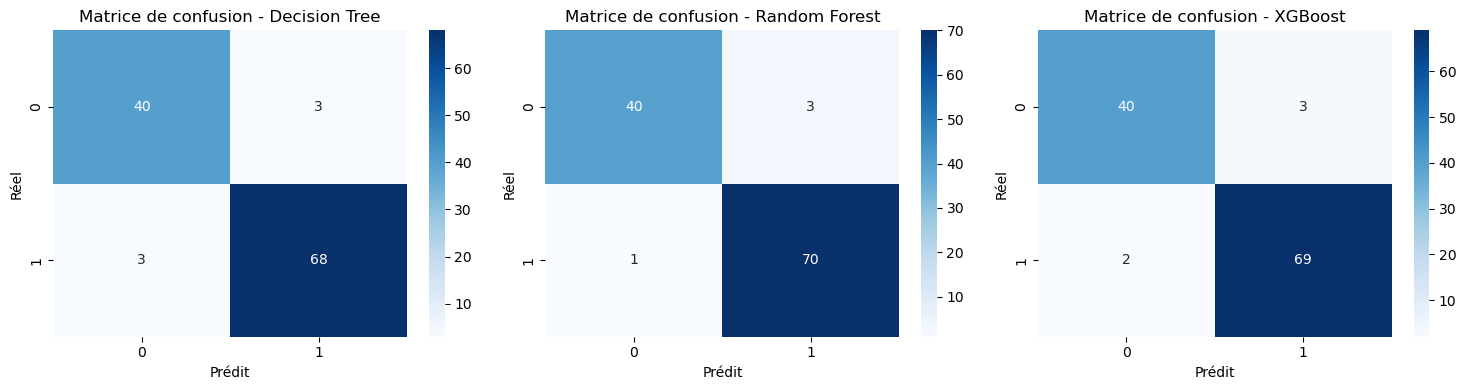

In [33]:
# Matrices de confusion
models = {
    "Decision Tree": (y_test, y_predict_dt),
    "Random Forest": (y_test, y_predict_rf),
    "XGBoost": (y_test, y_predict_xgb)
}

plt.figure(figsize=(15,4))
for i, (name, (y_true, y_pred)) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_true, y_pred)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
plt.tight_layout()
plt.show()

#### Comparaison et discussion

#### Interprétation des matrices de confusion

L’analyse des matrices de confusion obtenues pour les trois modèles (Decision Tree, Random Forest et XGBoost) permet d’évaluer la qualité de leurs prédictions sur le jeu de données.

Les résultats montrent que l’ensemble des modèles atteignent d’excellentes performances, avec une proportion d’erreurs très faible.
Le modèle `Decision Tree` présente une précision d’environ 94,7 %, mais commet quelques confusions équilibrées entre les deux classes (3 faux positifs et 3 faux négatifs), traduisant une légère tendance au sur-apprentissage.
Le modèle `Random Forest` se distingue par les meilleures performances globales (96,5 % d’accuracy), avec seulement 1 faux négatif et 3 faux positifs. Cela confirme sa robustesse, grâce à l’agrégation de plusieurs arbres de décision.
Le modèle `XGBoost`, quant à lui, obtient des résultats très proches (95,6 % d’accuracy), avec 2 faux négatifs et 3 faux positifs, confirmant sa grande stabilité et sa performance sur les données tabulaires.

D’un point de vue applicatif, il est important de souligner que les faux négatifs (cancers mal classés comme bénins) sont les erreurs les plus critiques dans un contexte médical. À ce titre, le modèle Random Forest apparaît comme le plus adapté, car il minimise ce type d’erreurs tout en conservant une excellente précision globale.

#### Analyse des importance de variables

Les résultats montrent que la variable `worst radius` (le plus grand rayon observé sur la tumeur) est de loin la plus influente, représentant à elle seule plus de 60 % de l’importance totale. Cette variable est suivie par `worst concave points` et `texture error`, dont les contributions restent notables mais bien moindres.
Les autres variables telles que worst texture, mean concave points ou area error ont un poids beaucoup plus faible, ce qui indique qu’elles apportent une information complémentaire mais moins décisive dans le processus de décision.